# Optimal new generation - summary

In [2]:
# Third-party packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Local imports
from utils import get_data
from utils import tech_order, tech_colors
from utils import get_data_sftp
import re
import geopandas as gpd
from shapely.geometry import Point, Polygon

from matplotlib import cm
from matplotlib.colors import Normalize
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib inline 
%matplotlib qt

plt.style.use("style.txt")
pd.options.display.float_format = '{:,.2f}'.format


Bad key legend.labelcolor in file style.txt, line 43 ('legend.labelcolor: black')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution


### Notebook constants

In [3]:
hostname="shasta-db1.ream.ucsd.edu"
username="n7gonzalez"
scenario_name = ['s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14',
                 's15','s16','s17','s18','s19','s20','s21','s22','s23','s24','s25']
savefig = False
folder_to_save_results="results_v2/"

figure_names={'s1':1,'s2':2,'s3':3,'s4':4,'s5':5,'s6':6,'s7':7,'s8':8,'s9':9,'s10':10,'s11':11,'s12':12,'s13':13,
              's14':14,'s15':15,'s16':16,'s17':17,'s18':18,'s19':19,'s20':20,'s21':21,'s22':22,'s23':23,'s24':24,
              's25':25}

In [4]:
# Name of output/input file to read
fname = "gen_cap.csv"

columns = [
    "GENERATION_PROJECT",
    "PERIOD",
    "gen_tech",
    "gen_load_zone",
    "GenCapacity",
]

#Get buildGen csv
gen_cap = get_data_sftp(hostname, username, scenario_name, fname, usecols=columns)
gen_cap=gen_cap.replace({"scenario": figure_names})
gen_cap = gen_cap.astype({'scenario':'int'})
gen_cap = gen_cap.astype({'GENERATION_PROJECT':'int'})
gen_cap


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,77333,2020,Wind,CA_SCE_CEN,0.00,Wind,1
1,77333,2030,Wind,CA_SCE_CEN,0.00,Wind,1
2,77333,2040,Wind,CA_SCE_CEN,43.00,Wind,1
3,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
4,77334,2020,Wind,CA_SCE_CEN,0.00,Wind,1
...,...,...,...,...,...,...,...
36441,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,25
36442,1400000201,2020,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
36443,1400000201,2030,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
36444,1400000201,2040,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25


In [5]:
gen_cap = gen_cap[gen_cap['PERIOD'] == 2050]
gen_cap

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
3,77333,2050,Wind,CA_SCE_CEN,43.00,Wind,1
7,77334,2050,Wind,CA_SCE_CEN,50.00,Wind,1
11,77335,2050,Wind,CA_SCE_CEN,49.00,Wind,1
15,77336,2050,Wind,CA_SCE_CEN,92.00,Wind,1
19,77337,2050,Wind,CA_SCE_CEN,66.00,Wind,1
...,...,...,...,...,...,...,...
36429,1400000197,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,25
36433,1400000198,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,25
36437,1400000199,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
36441,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,25


In [6]:
usa = gpd.read_file('/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/shape_files/states/states.shp')
usa.head()
usa ['coords'] = usa ['geometry'].apply(lambda x: x.representative_point().coords[:])
usa ['coords'] = [coords[0] for coords in usa['coords']]

In [7]:
def dms_to_dd(lat):
    deg, minutes, seconds, direction =  re.split('[°\'"]', lat)
    return (float(deg) + float(minutes)/60 + float(seconds)/(60*60)) * (-1 if direction in [' W', ' S'] else 1)

In [8]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V2 Work/finalized files/final_cand_proj_areas_sizing.csv'
sites=pd.read_csv(path)
sites

,site_id,GENERATION_PROJECT,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
0,0,1400000000,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
1,1,1400000001,Neah Bay 2,WA,48.19,-125.07,WA_W,"1,285.43","1,351.63","5,527.34",float
2,2,1400000002,La Push 1,WA,48.04,-124.92,WA_W,90.09,94.73,387.37,float
3,3,1400000003,La Push 2,WA,47.92,-124.70,WA_W,103.05,108.36,443.13,fixed
4,4,1400000004,La Push 3,WA,47.82,-124.58,WA_W,180.37,189.65,775.57,fixed
...,...,...,...,...,...,...,...,...,...,...,...
197,96,1400000197,Port Hueneme 1,CA,34.07,-119.19,CA_SCE_CEN,277.10,291.37,"1,191.53",float
198,97,1400000198,Torrance,CA,33.53,-118.87,CA_SCE_S,780.05,820.23,"3,354.24",float
199,98,1400000199,Morro Bay_Call,CA,35.58,-121.84,CA_PGE_S,975.39,"1,025.62","4,194.18",float
200,99,1400000200,San Diego,CA,32.63,-117.33,CA_SDGE,"1,419.39","1,492.49","6,103.40",float


In [9]:
path = '/Users/nataliagonzalez/Documents/UCSD PhD/2022/Research 2022/Wave Energy/V1 Work/sites_of_interest.csv'
sites_of_interest = pd.read_csv(path)
sites_of_interest

,,name,state,lat,lon,type,wc_lon,wc_lat,wc_id,es_lon,es_lat,es_id,energy,revenue
0,0,Neah Bay 1,WA,48.28,-124.77,sites_of_interest,-124.82,48.32,121000,-122.69,48.21,1186,858.75,159.21
1,1,Neah Bay 2,WA,48.19,-125.07,sites_of_interest,-125.01,48.18,52000,-123.01,47.09,2268,"1,112.81",190.55
2,2,La Push 1,WA,48.04,-124.92,sites_of_interest,-124.91,48.07,110000,-123.01,47.09,2268,"1,067.81",182.31
3,3,La Push 2,WA,47.92,-124.70,sites_of_interest,-124.78,47.90,144000,-123.01,47.09,2268,"1,035.71",175.13
4,4,La Push 3,WA,47.82,-124.58,sites_of_interest,-124.54,47.83,211000,-123.01,47.09,2268,0.21,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,Lompoc 8,CA,34.08,-120.46,sites_of_interest,-120.45,33.98,483000,-120.43,34.53,3249,"1,064.01",192.84
96,96,Port Hueneme 1,CA,34.07,-119.19,sites_of_interest,-119.14,34.09,422000,-119.17,34.13,3941,54.21,73.90
97,97,Torrance,CA,33.53,-118.87,sites_of_interest,-118.99,33.82,250000,-118.39,33.85,4413,99.90,109.12
98,98,Port Hueneme 2,CA,33.28,-119.61,sites_of_interest,-120.01,33.51,297000,-119.17,34.13,3941,997.61,154.49


In [10]:
gen_cap_osw_wave = gen_cap.copy()
gen_cap_osw_wave = gen_cap_osw_wave[gen_cap_osw_wave['GENERATION_PROJECT'].isin(range(1400000000,1400000202))]
gen_cap_osw_wave.reset_index(inplace=True,drop=True)
gen_cap_osw_wave

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario
0,1400000000,2050,Wave,WA_W,0.00,Wave,1
1,1400000001,2050,Wave,WA_W,0.00,Wave,1
2,1400000002,2050,Wave,WA_W,0.00,Wave,1
3,1400000003,2050,Wave,WA_W,0.00,Wave,1
4,1400000004,2050,Wave,WA_W,0.00,Wave,1
...,...,...,...,...,...,...,...
5045,1400000197,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,25
5046,1400000198,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,25
5047,1400000199,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,25
5048,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,25


In [11]:
gen_cap_osw_wave = pd.merge(gen_cap_osw_wave, sites, on='GENERATION_PROJECT')
gen_cap_osw_wave

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
0,1400000000,2050,Wave,WA_W,0.00,Wave,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
1,1400000000,2050,Wave,WA_W,0.00,Wave,2,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2,1400000000,2050,Wave,WA_W,0.00,Wave,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
3,1400000000,2050,Wave,WA_W,139.69,Wave,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
4,1400000000,2050,Wave,WA_W,139.69,Wave,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,21,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5046,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,22,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5047,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,23,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5048,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float


In [12]:
gen_cap_osw_wave_nonzero = gen_cap_osw_wave.copy()
gen_cap_osw_wave_nonzero = gen_cap_osw_wave_nonzero.loc[gen_cap_osw_wave_nonzero.GenCapacity > 0]
gen_cap_osw_wave_nonzero

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
3,1400000000,2050,Wave,WA_W,139.69,Wave,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
4,1400000000,2050,Wave,WA_W,139.69,Wave,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
8,1400000000,2050,Wave,WA_W,139.69,Wave,9,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
9,1400000000,2050,Wave,WA_W,139.69,Wave,10,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
13,1400000000,2050,Wave,WA_W,139.69,Wave,14,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,21,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4921,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,22,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4922,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,23,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4923,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,24,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed


In [13]:
gen_cap_wave = gen_cap_osw_wave[gen_cap_osw_wave['gen_tech'] == 'Wave']
gen_cap_wave

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
0,1400000000,2050,Wave,WA_W,0.00,Wave,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
1,1400000000,2050,Wave,WA_W,0.00,Wave,2,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2,1400000000,2050,Wave,WA_W,0.00,Wave,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
3,1400000000,2050,Wave,WA_W,139.69,Wave,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
4,1400000000,2050,Wave,WA_W,139.69,Wave,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,1400000100,2050,Wave,CA_PGE_S,0.00,Wave,21,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
2521,1400000100,2050,Wave,CA_PGE_S,0.00,Wave,22,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
2522,1400000100,2050,Wave,CA_PGE_S,0.00,Wave,23,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
2523,1400000100,2050,Wave,CA_PGE_S,"1,515.70",Wave,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float


In [14]:
gen_cap_osw = gen_cap_osw_wave[gen_cap_osw_wave['gen_tech'] == 'Offshore_Wind']
gen_cap_osw

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
2525,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2526,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,2,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2527,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2528,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2529,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,21,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5046,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,22,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5047,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,23,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5048,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float


In [15]:
gen_cap_osw.loc[:,'Percent of Project Capacity Built']=gen_cap_osw.apply(lambda x: ((x['GenCapacity']/x['osw_cap_mw'])*100), axis=1)
gen_cap_osw

<ipython-input-15-4a9b1a8a210e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_cap_osw.loc[:,'Percent of Project Capacity Built']=gen_cap_osw.apply(lambda x: ((x['GenCapacity']/x['osw_cap_mw'])*100), axis=1)


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type,Percent of Project Capacity Built
2525,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
2526,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,2,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
2527,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
2528,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
2529,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,21,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00
5046,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,22,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00
5047,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,23,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00
5048,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00


In [16]:
gen_cap_wave.loc[:,'Percent of Project Capacity Built']=gen_cap_wave.apply(lambda x: ((x['GenCapacity']/x['wave_cap_mw'])*100), axis=1)
gen_cap_wave

<ipython-input-16-c930177fedfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gen_cap_wave.loc[:,'Percent of Project Capacity Built']=gen_cap_wave.apply(lambda x: ((x['GenCapacity']/x['wave_cap_mw'])*100), axis=1)


,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type,Percent of Project Capacity Built
0,1400000000,2050,Wave,WA_W,0.00,Wave,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
1,1400000000,2050,Wave,WA_W,0.00,Wave,2,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
2,1400000000,2050,Wave,WA_W,0.00,Wave,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
3,1400000000,2050,Wave,WA_W,139.69,Wave,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,100.00
4,1400000000,2050,Wave,WA_W,139.69,Wave,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,100.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2520,1400000100,2050,Wave,CA_PGE_S,0.00,Wave,21,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00
2521,1400000100,2050,Wave,CA_PGE_S,0.00,Wave,22,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00
2522,1400000100,2050,Wave,CA_PGE_S,0.00,Wave,23,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,0.00
2523,1400000100,2050,Wave,CA_PGE_S,"1,515.70",Wave,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float,100.00


In [17]:
gen_cap_wave[gen_cap_wave['scenario'] == 3].head(25)

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type,Percent of Project Capacity Built
2,1400000000,2050,Wave,WA_W,0.00,Wave,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
27,1400000001,2050,Wave,WA_W,0.00,Wave,3,1,Neah Bay 2,WA,48.19,-125.07,WA_W,"1,285.43","1,351.63","5,527.34",float,0.00
52,1400000002,2050,Wave,WA_W,94.72,Wave,3,2,La Push 1,WA,48.04,-124.92,WA_W,90.09,94.73,387.37,float,100.00
77,1400000003,2050,Wave,WA_W,108.36,Wave,3,3,La Push 2,WA,47.92,-124.70,WA_W,103.05,108.36,443.13,fixed,100.00
102,1400000004,2050,Wave,WA_W,0.00,Wave,3,4,La Push 3,WA,47.82,-124.58,WA_W,180.37,189.65,775.57,fixed,0.00
127,1400000005,2050,Wave,OR_W,304.16,Wave,3,5,Queets,WA,47.51,-124.46,OR_W,289.26,304.16,"1,243.83",fixed,100.00
152,1400000006,2050,Wave,OR_W,0.00,Wave,3,6,Taholah,WA,47.27,-124.40,OR_W,378.44,397.93,"1,627.31",fixed,0.00
177,1400000007,2050,Wave,OR_W,0.00,Wave,3,7,Ocean Shores 1,WA,47.04,-124.41,OR_W,277.60,291.89,"1,193.67",fixed,0.00
202,1400000008,2050,Wave,OR_W,0.00,Wave,3,8,Ocean Shores 2,WA,46.96,-124.26,OR_W,149.72,157.43,643.80,fixed,0.00
227,1400000009,2050,Wave,OR_W,227.42,Wave,3,9,Grayland,WA,46.69,-124.21,OR_W,216.28,227.42,930.02,fixed,100.00


In [18]:
s_list = []
for i in range(1,26):
    s_list.append('s'+str(i))
for id in range(1,26):
    s_list[i-1] = gen_cap_wave[gen_cap_wave['scenario']==i]

In [19]:
s_list[0]

's1'

In [20]:
d = {i: gen_cap_wave[gen_cap_wave['scenario']==i] for i in range(1,26)}

In [21]:
d[1]

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type,Percent of Project Capacity Built
0,1400000000,2050,Wave,WA_W,0.00,Wave,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
25,1400000001,2050,Wave,WA_W,0.00,Wave,1,1,Neah Bay 2,WA,48.19,-125.07,WA_W,"1,285.43","1,351.63","5,527.34",float,0.00
50,1400000002,2050,Wave,WA_W,0.00,Wave,1,2,La Push 1,WA,48.04,-124.92,WA_W,90.09,94.73,387.37,float,0.00
75,1400000003,2050,Wave,WA_W,0.00,Wave,1,3,La Push 2,WA,47.92,-124.70,WA_W,103.05,108.36,443.13,fixed,0.00
100,1400000004,2050,Wave,WA_W,0.00,Wave,1,4,La Push 3,WA,47.82,-124.58,WA_W,180.37,189.65,775.57,fixed,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2400,1400000096,2050,Wave,CA_SCE_CEN,0.00,Wave,1,96,Port Hueneme 1,CA,34.07,-119.19,CA_SCE_CEN,277.10,291.37,"1,191.53",float,0.00
2425,1400000097,2050,Wave,CA_SCE_S,0.00,Wave,1,97,Torrance,CA,33.53,-118.87,CA_SCE_S,780.05,820.23,"3,354.24",float,0.00
2450,1400000098,2050,Wave,CA_PGE_S,0.00,Wave,1,98,Morro Bay_Call,CA,35.58,-121.84,CA_PGE_S,975.39,"1,025.62","4,194.18",float,0.00
2475,1400000099,2050,Wave,CA_SDGE,0.00,Wave,1,99,San Diego,CA,32.63,-117.33,CA_SDGE,"1,419.39","1,492.49","6,103.40",float,0.00


In [22]:
d_osw = {i: gen_cap_osw[gen_cap_osw['scenario']==i] for i in range(1,26)}

In [23]:
d_osw[1]

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type,Percent of Project Capacity Built
2525,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed,0.00
2550,1400000102,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,1,Neah Bay 2,WA,48.19,-125.07,WA_W,"1,285.43","1,351.63","5,527.34",float,0.00
2575,1400000103,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,2,La Push 1,WA,48.04,-124.92,WA_W,90.09,94.73,387.37,float,0.00
2600,1400000104,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,3,La Push 2,WA,47.92,-124.70,WA_W,103.05,108.36,443.13,fixed,0.00
2625,1400000105,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,4,La Push 3,WA,47.82,-124.58,WA_W,180.37,189.65,775.57,fixed,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4925,1400000197,2050,Offshore_Wind,CA_SCE_CEN,0.00,Offshore_Wind,1,96,Port Hueneme 1,CA,34.07,-119.19,CA_SCE_CEN,277.10,291.37,"1,191.53",float,0.00
4950,1400000198,2050,Offshore_Wind,CA_SCE_S,0.00,Offshore_Wind,1,97,Torrance,CA,33.53,-118.87,CA_SCE_S,780.05,820.23,"3,354.24",float,0.00
4975,1400000199,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,1,98,Morro Bay_Call,CA,35.58,-121.84,CA_PGE_S,975.39,"1,025.62","4,194.18",float,0.00
5000,1400000200,2050,Offshore_Wind,CA_SDGE,0.00,Offshore_Wind,1,99,San Diego,CA,32.63,-117.33,CA_SDGE,"1,419.39","1,492.49","6,103.40",float,0.00


In [24]:
# s1_sorted = ((s1.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
# s2_sorted = ((s2.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
# s3_sorted = ((s3.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
# s4_sorted = ((s4.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)
# s5_sorted = ((s5.sort_values(['Total MW'],ascending=False).rename(columns={'matching soi':'Site of Interest','lat_soi':'Latitude','lon_soi':'Longitude'})).drop(['GENERATION_PROJECT','PERIOD','gen_tech','gen_load_zone','GenCapacity','tech_map','scenario','area_km2','loc_id','Project Capacity (MW)'],axis=1)).reset_index(drop=True)

In [25]:
# s1_sorted = s1_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
# s2_sorted = s2_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
# s3_sorted = s3_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
# s4_sorted = s4_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]
# s5_sorted = s5_sorted[['Site of Interest','Site Name','Longitude','Latitude','Total MW','Percent of Project Capacity Built']]

In [26]:
# s3_sorted.head(50)

In [27]:
# s1_sorted.to_csv('scenario_1_site_ranking.csv',index = True,index_label='Rank')
# s2_sorted.to_csv('scenario_2_site_ranking.csv',index = True,index_label='Rank')
# s3_sorted.to_csv('scenario_3_site_ranking.csv',index = True,index_label='Rank')
# s4_sorted.to_csv('scenario_4_site_ranking.csv',index = True,index_label='Rank')
# s5_sorted.to_csv('scenario_5_site_ranking.csv',index = True,index_label='Rank')

In [28]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d_osw[1]['lon']
y = d_osw[1]['lat']
a = d_osw[1]['Percent of Project Capacity Built'].min()
b = d_osw[1]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d_osw[1]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Offshore Wind Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Offshore Wind Project Capacity Built at Each Site in Scenario 1')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [29]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d[1]['lon']
y = d[1]['lat']
a = d[1]['Percent of Project Capacity Built'].min()
b = d[1]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d[1]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Wave Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Wave Project Capacity Built at Each Site in Scenario 1')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [30]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d[1]['lon']
y = d[1]['lat']
a = d[1]['GenCapacity'].min()
b = d[1]['GenCapacity'].max()
s = ax1.scatter(x, y, c = d[1]['GenCapacity'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Wave Capacity Built at Each Site in Scenario 1')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')


In [31]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d_osw[7]['lon']
y = d_osw[7]['lat']
a = d_osw[7]['Percent of Project Capacity Built'].min()
b = d_osw[7]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d_osw[7]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Offshore Wind Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Offshore Wind Project Capacity Built at Each Site in Scenario 7')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [32]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d[7]['lon']
y = d[7]['lat']
a = d[7]['Percent of Project Capacity Built'].min()
b = d[7]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d[7]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Wave Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Wave Project Capacity Built at Each Site in Scenario 7')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [33]:
# Plot
fig, ax2 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
#sit = ax2.scatter(sites_of_interest['lon'],sites_of_interest['lat'], s =4)
x = d[7]['lon']
y = d[7]['lat']
a = d[7]['GenCapacity'].min()
b = d[7]['GenCapacity'].max()
s = ax2.scatter(x, y, c = d[7]['GenCapacity'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax2,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax2.set_xlabel('Longitude',fontsize=7)
ax2.set_ylabel('Latitude',fontsize=7)
ax2.set_ylim(32,50)
ax2.set_title('Capacity Built at Each Site in Scenario 7')

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [34]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d_osw[13]['lon']
y = d_osw[13]['lat']
a = d_osw[13]['Percent of Project Capacity Built'].min()
b = d_osw[13]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d_osw[13]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Offshore Wind Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Offshore Wind Project Capacity Built at Each Site in Scenario 13')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [35]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d[13]['lon']
y = d[13]['lat']
a = d[13]['Percent of Project Capacity Built'].min()
b = d[13]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d[13]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Wave Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Wave Project Capacity Built at Each Site in Scenario 13')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [36]:
# Plot
fig, ax3 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax3.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)

x = d[13]['lon']
y = d[13]['lat']
a = d[13]['GenCapacity'].min()
b = d[13]['GenCapacity'].max()
s = ax3.scatter(x, y, c = d[13]['GenCapacity'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax3,fraction=0.07, pad=0.03)
ax3.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
ax3.set_ylabel('Latitude',fontsize=7)
ax3.set_ylim(32,50)
ax3.set_title('Capacity Built at Each Site in Scenario 13')

# ax3.set_ylabel("Latitude")
# ax3.set_xlabel("Longitude")
ax3.grid(axis='y', linestyle='dashed')
ax3.grid(axis='x', linestyle='dashed')
#handles, labels = ax3.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax3.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [37]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d_osw[19]['lon']
y = d_osw[19]['lat']
a = d_osw[19]['Percent of Project Capacity Built'].min()
b = d_osw[19]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d_osw[19]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Offshore Wind Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Offshore Wind Project Capacity Built at Each Site in Scenario 19')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [38]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d[19]['lon']
y = d[19]['lat']
a = d[19]['Percent of Project Capacity Built'].min()
b = d[19]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d[19]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Wave Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Wave Project Capacity Built at Each Site in Scenario 19')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [39]:
# Plot
fig, ax4 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax4.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)

x = d[19]['lon']
y = d[19]['lat']
a = d[19]['GenCapacity'].min()
b = d[19]['GenCapacity'].max()
s = ax4.scatter(x, y, c = d[19]['GenCapacity'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax4,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax4.set_xlabel('Longitude',fontsize=7)
ax4.set_ylabel('Latitude',fontsize=7)
ax4.set_ylim(32,50)
ax4.set_title('Capacity Built at Each Site in Scenario 19')

# ax4.set_ylabel("Latitude")
# ax4.set_xlabel("Longitude")
ax4.grid(axis='y', linestyle='dashed')
ax4.grid(axis='x', linestyle='dashed')
#handles, labels = ax4.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax4.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [40]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d_osw[25]['lon']
y = d_osw[25]['lat']
a = d_osw[25]['Percent of Project Capacity Built'].min()
b = d_osw[25]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d_osw[25]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Offshore Wind Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Offshore Wind Project Capacity Built at Each Site in Scenario 25')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [41]:
# Plot
fig, ax1 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = d[25]['lon']
y = d[25]['lat']
a = d[25]['Percent of Project Capacity Built'].min()
b = d[25]['Percent of Project Capacity Built'].max()
s = ax1.scatter(x, y, c = d[25]['Percent of Project Capacity Built'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Percent of Wave Project Capacity Built', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Percent of Wave Project Capacity Built at Each Site in Scenario 25')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [42]:
# Plot
fig, ax5 = plt.subplots(1,1,figsize=(3,6), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax5.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax5, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax5, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax5, color='white', edgecolor='black', linewidth=1)

x = d[25]['lon']
y = d[25]['lat']
a = d[25]['GenCapacity'].min()
b = d[25]['GenCapacity'].max()
s = ax5.scatter(x, y, c = d[25]['GenCapacity'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax5,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (MW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax5.set_xlabel('Longitude',fontsize=7)
ax5.set_ylabel('Latitude',fontsize=7)
ax5.set_ylim(32,50)
ax5.set_title('Capacity Built at Each Site in Scenario 25')

# ax5.set_ylabel("Latitude")
# ax5.set_xlabel("Longitude")
ax5.grid(axis='y', linestyle='dashed')
ax5.grid(axis='x', linestyle='dashed')
#handles, labels = ax5.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax5.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [43]:
gen_cap_osw = gen_cap_osw_wave[gen_cap_osw_wave['gen_tech'] == 'Offshore_Wind']
gen_cap_osw

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
2525,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2526,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,2,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2527,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,3,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2528,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2529,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,21,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5046,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,22,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5047,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,23,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5048,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float


In [44]:
nonzero_cap = gen_cap_osw_wave[gen_cap_osw_wave['GenCapacity'] > 0]
nonzero_cap_osw = nonzero_cap[nonzero_cap['gen_tech']=='Offshore_Wind']
nonzero_cap_wave = nonzero_cap[nonzero_cap['gen_tech']=='Wave']

In [45]:
nonzero_cap_wave

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
3,1400000000,2050,Wave,WA_W,139.69,Wave,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
4,1400000000,2050,Wave,WA_W,139.69,Wave,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
8,1400000000,2050,Wave,WA_W,139.69,Wave,9,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
9,1400000000,2050,Wave,WA_W,139.69,Wave,10,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
13,1400000000,2050,Wave,WA_W,139.69,Wave,14,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,1400000100,2050,Wave,CA_PGE_S,"1,515.70",Wave,15,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
2518,1400000100,2050,Wave,CA_PGE_S,"1,515.70",Wave,19,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
2519,1400000100,2050,Wave,CA_PGE_S,"1,515.70",Wave,20,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
2523,1400000100,2050,Wave,CA_PGE_S,"1,515.70",Wave,24,100,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float


In [46]:
nonzero_cap_osw

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
2540,1400000101,2050,Offshore_Wind,WA_W,571.26,Offshore_Wind,16,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2541,1400000101,2050,Offshore_Wind,WA_W,571.26,Offshore_Wind,17,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2542,1400000101,2050,Offshore_Wind,WA_W,571.26,Offshore_Wind,18,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2543,1400000101,2050,Offshore_Wind,WA_W,571.26,Offshore_Wind,19,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2544,1400000101,2050,Offshore_Wind,WA_W,571.26,Offshore_Wind,20,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,21,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4921,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,22,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4922,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,23,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4923,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,24,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed


In [47]:
nonzero_cap

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
3,1400000000,2050,Wave,WA_W,139.69,Wave,4,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
4,1400000000,2050,Wave,WA_W,139.69,Wave,5,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
8,1400000000,2050,Wave,WA_W,139.69,Wave,9,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
9,1400000000,2050,Wave,WA_W,139.69,Wave,10,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
13,1400000000,2050,Wave,WA_W,139.69,Wave,14,0,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4920,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,21,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4921,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,22,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4922,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,23,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed
4923,1400000196,2050,Offshore_Wind,CA_PGE_S,55.92,Offshore_Wind,24,95,Lompoc 8,CA,34.08,-120.46,CA_PGE_S,13.00,13.67,55.92,fixed


In [48]:
only_wave_or_only_osw = pd.merge(gen_cap_osw, gen_cap_wave, how='inner', on=['site_id','lon', 'lat','site_name','scenario','area_sq_km','PERIOD','gen_load_zone','wind_turbine_type','state','wave_cap_mw','osw_cap_mw'],suffixes=('_osw','_wave'))
only_wave_or_only_osw = only_wave_or_only_osw[['scenario','site_id','PERIOD','gen_load_zone','wind_turbine_type','wave_cap_mw','GenCapacity_wave','osw_cap_mw','GenCapacity_osw']]
only_wave_or_only_osw = only_wave_or_only_osw.sort_values(by=['scenario','site_id'])
only_wave_or_only_osw.loc[:,'Total_GW'] = only_wave_or_only_osw.apply(lambda x: sum(x[c] for c in ['GenCapacity_osw','GenCapacity_wave'])/ 1e3, axis=1)
only_wave = only_wave_or_only_osw[only_wave_or_only_osw['GenCapacity_wave']> 0]
only_wave = only_wave[only_wave['GenCapacity_osw'] == 0]
only_osw = only_wave_or_only_osw[only_wave_or_only_osw['GenCapacity_osw']> 0]
only_osw = only_osw[only_osw['GenCapacity_wave'] == 0]
only_wave_or_only_osw = pd.concat([only_wave,only_osw])
only_wave_or_only_osw = only_wave_or_only_osw.sort_values(by=['scenario','site_id'])
only_wave_or_only_osw.reset_index(inplace=True,drop=True)
only_wave_or_only_osw

,scenario,site_id,PERIOD,gen_load_zone,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW
0,1,7,2050,OR_W,fixed,291.89,0.00,"1,193.67","1,193.70",1.19
1,1,8,2050,OR_W,fixed,157.43,0.00,643.80,643.80,0.64
2,1,21,2050,OR_W,fixed,11.40,0.00,46.61,46.61,0.05
3,1,28,2050,OR_W,fixed,67.21,0.00,274.85,274.85,0.27
4,1,32,2050,OR_W,float,38.99,38.99,159.46,0.00,0.04
...,...,...,...,...,...,...,...,...,...,...
1257,25,96,2050,CA_SCE_CEN,float,291.37,291.37,"1,191.53",0.00,0.29
1258,25,97,2050,CA_SCE_S,float,820.23,820.23,"3,354.24",0.00,0.82
1259,25,98,2050,CA_PGE_S,float,"1,025.62","1,025.60","4,194.18",0.00,1.03
1260,25,99,2050,CA_SDGE,float,"1,492.49","1,492.50","6,103.40",0.00,1.49


In [49]:
only_wave_or_osw_d = {i: only_wave_or_only_osw[only_wave_or_only_osw['scenario']==i] for i in range(1,26)}

In [50]:
for i in range(1,26):
    only_wave_or_osw_d[i]['percent_built_cap_wave'] = only_wave_or_osw_d[i]['GenCapacity_wave']*100/(only_wave_or_osw_d[i]['Total_GW']*1000)
    only_wave_or_osw_d[i]['percent_built_cap_osw'] = only_wave_or_osw_d[i]['GenCapacity_osw']*100/(only_wave_or_osw_d[i]['Total_GW']*1000)

<ipython-input-50-bab589a10702>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_wave_or_osw_d[i]['percent_built_cap_wave'] = only_wave_or_osw_d[i]['GenCapacity_wave']*100/(only_wave_or_osw_d[i]['Total_GW']*1000)
<ipython-input-50-bab589a10702>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_wave_or_osw_d[i]['percent_built_cap_osw'] = only_wave_or_osw_d[i]['GenCapacity_osw']*100/(only_wave_or_osw_d[i]['Total_GW']*1000)
<ipython-input-50-bab589a10702>:2: SettingWithCopyWarning: 
A value is trying 

In [51]:
only_wave_or_osw_d[25]

,scenario,site_id,PERIOD,gen_load_zone,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW,percent_built_cap_wave,percent_built_cap_osw
1202,25,2,2050,WA_W,float,94.73,94.72,387.37,0.00,0.09,100.00,0.00
1203,25,3,2050,WA_W,fixed,108.36,108.36,443.13,0.00,0.11,100.00,0.00
1204,25,4,2050,WA_W,fixed,189.65,189.65,775.57,0.00,0.19,100.00,0.00
1205,25,5,2050,OR_W,fixed,304.16,304.16,"1,243.83",0.00,0.30,100.00,0.00
1206,25,7,2050,OR_W,fixed,291.89,0.00,"1,193.67","1,193.70",1.19,0.00,100.00
1207,25,12,2050,OR_W,float,242.84,242.84,993.08,0.00,0.24,100.00,0.00
1208,25,13,2050,OR_W,fixed,16.90,16.90,69.12,0.00,0.02,100.00,0.00
1209,25,14,2050,OR_W,fixed,14.24,14.24,58.24,0.00,0.01,100.00,0.00
1210,25,15,2050,OR_W,float,"3,194.94","1,059.90","13,065.36",0.00,1.06,100.00,0.00
1211,25,16,2050,OR_W,float,299.92,299.92,"1,226.47",0.00,0.30,100.00,0.00


In [52]:
percentages_for_homo_projects = only_wave_or_osw_d[13].sort_index()
percentages_for_homo_projects

,scenario,site_id,PERIOD,gen_load_zone,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW,percent_built_cap_wave,percent_built_cap_osw
593,13,2,2050,WA_W,float,94.73,94.72,387.37,0.00,0.09,100.00,0.00
594,13,5,2050,OR_W,fixed,304.16,304.16,"1,243.83",0.00,0.30,100.00,0.00
595,13,6,2050,OR_W,fixed,397.93,0.00,"1,627.31","1,627.30",1.63,0.00,100.00
596,13,7,2050,OR_W,fixed,291.89,0.00,"1,193.67","1,193.70",1.19,0.00,100.00
597,13,8,2050,OR_W,fixed,157.43,0.00,643.80,643.80,0.64,0.00,100.00
598,13,10,2050,OR_W,fixed,57.81,0.00,236.42,236.42,0.24,0.00,100.00
599,13,13,2050,OR_W,fixed,16.90,16.90,69.12,0.00,0.02,100.00,0.00
600,13,17,2050,OR_W,fixed,40.02,40.02,163.66,0.00,0.04,100.00,0.00
601,13,19,2050,OR_W,fixed,20.34,0.00,83.19,83.19,0.08,0.00,100.00
602,13,21,2050,OR_W,fixed,11.40,0.00,46.61,46.61,0.05,0.00,100.00


In [53]:
percentages_for_homo_projects.to_csv('percentages_for_homo_projects.csv',index=False)

In [54]:
collocated_sites = pd.merge(nonzero_cap_osw, nonzero_cap_wave, how='inner', on=['site_id','lon', 'lat','scenario','area_sq_km','PERIOD','gen_load_zone','wind_turbine_type','state','wave_cap_mw','osw_cap_mw'],suffixes=('_osw','_wave'))
#collocated_sites.dropna(inplace=True)
collocated_sites.drop(columns={'tech_map_osw','tech_map_wave','gen_tech_osw','gen_tech_wave','site_name_osw','site_name_wave','load_zone_wave','load_zone_osw'},inplace=True)
collocated_sites.loc[:,'Total_GW']=collocated_sites.apply(lambda x: sum(x[c] for c in ['GenCapacity_osw','GenCapacity_wave'])/ 1e3, axis=1)
collocated_sites = collocated_sites[['scenario','PERIOD','site_id','GENERATION_PROJECT_wave','GENERATION_PROJECT_osw','lat','lon','state','gen_load_zone','area_sq_km','wind_turbine_type','wave_cap_mw','GenCapacity_wave','osw_cap_mw','GenCapacity_osw','Total_GW']].sort_values(by='scenario')
collocated_sites = collocated_sites.sort_values(by=['scenario','site_id'])
collocated_sites

,scenario,PERIOD,site_id,GENERATION_PROJECT_wave,GENERATION_PROJECT_osw,lat,lon,state,gen_load_zone,area_sq_km,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW
127,1,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10
128,2,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10
77,3,2050,28,1400000028,1400000129,44.13,-124.17,OR,OR_W,63.92,fixed,67.21,67.21,274.85,274.85,0.34
129,3,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10
12,4,2050,8,1400000008,1400000109,46.96,-124.26,WA,OR_W,149.72,fixed,157.43,157.43,643.80,643.80,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,2050,68,1400000068,1400000169,42.16,-124.82,OR,OR_W,"1,159.48",float,"1,219.20","1,219.20","4,985.78","4,985.80",6.21
214,25,2050,88,1400000088,1400000189,34.55,-120.69,CA,CA_PGE_S,25.16,float,26.46,26.46,108.19,108.19,0.13
218,25,2050,90,1400000090,1400000191,34.40,-120.64,CA,CA_PGE_S,95.17,float,100.07,100.07,409.23,409.23,0.51
222,25,2050,91,1400000091,1400000192,34.37,-120.53,CA,CA_PGE_S,115.92,float,121.89,121.89,498.45,498.45,0.62


In [55]:
coloc_d = {i: collocated_sites[collocated_sites['scenario']==i] for i in range(1,26)}

In [56]:
for i in range(1,26):
    coloc_d[i]['percent_built_cap_wave'] = coloc_d[i]['GenCapacity_wave']*100/(coloc_d[i]['Total_GW']*1000)
    coloc_d[i]['percent_built_cap_osw'] = coloc_d[i]['GenCapacity_osw']*100/(coloc_d[i]['Total_GW']*1000)

<ipython-input-56-ca2312f5fdff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coloc_d[i]['percent_built_cap_wave'] = coloc_d[i]['GenCapacity_wave']*100/(coloc_d[i]['Total_GW']*1000)
<ipython-input-56-ca2312f5fdff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coloc_d[i]['percent_built_cap_osw'] = coloc_d[i]['GenCapacity_osw']*100/(coloc_d[i]['Total_GW']*1000)
<ipython-input-56-ca2312f5fdff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[ro

In [57]:
coloc_d[25]

,scenario,PERIOD,site_id,GENERATION_PROJECT_wave,GENERATION_PROJECT_osw,lat,lon,state,gen_load_zone,area_sq_km,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW,percent_built_cap_wave,percent_built_cap_osw
1,25,2050,0,1400000000,1400000101,48.28,-124.77,WA,WA_W,132.85,fixed,139.69,139.69,571.26,571.26,0.71,19.65,80.35
3,25,2050,1,1400000001,1400000102,48.19,-125.07,WA,WA_W,"1,285.43",float,"1,351.63","1,351.60","5,527.34","4,123.00",5.47,24.69,75.31
7,25,2050,6,1400000006,1400000107,47.27,-124.40,WA,OR_W,378.44,fixed,397.93,397.93,"1,627.31","1,627.30",2.03,19.65,80.35
19,25,2050,8,1400000008,1400000109,46.96,-124.26,WA,OR_W,149.72,fixed,157.43,157.43,643.80,643.80,0.80,19.65,80.35
28,25,2050,9,1400000009,1400000110,46.69,-124.21,WA,OR_W,216.28,fixed,227.42,227.42,930.02,930.02,1.16,19.65,80.35
34,25,2050,10,1400000010,1400000111,46.39,-124.25,WA,OR_W,54.98,fixed,57.81,57.81,236.42,236.42,0.29,19.65,80.35
42,25,2050,11,1400000011,1400000112,46.39,-124.12,WA,OR_W,70.14,fixed,73.76,73.75,301.61,301.61,0.38,19.65,80.35
46,25,2050,17,1400000017,1400000118,45.64,-123.99,OR,OR_W,38.06,fixed,40.02,40.02,163.66,163.66,0.20,19.65,80.35
50,25,2050,18,1400000018,1400000119,45.28,-124.01,OR,OR_W,37.20,fixed,39.12,39.12,159.97,159.97,0.20,19.65,80.35
56,25,2050,19,1400000019,1400000120,45.19,-124.01,OR,OR_W,19.35,fixed,20.34,20.34,83.19,83.19,0.10,19.65,80.35


In [58]:
percentages_for_hybrid_projects = coloc_d[13].sort_index()
percentages_for_hybrid_projects

,scenario,PERIOD,site_id,GENERATION_PROJECT_wave,GENERATION_PROJECT_osw,lat,lon,state,gen_load_zone,area_sq_km,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW,percent_built_cap_wave,percent_built_cap_osw
20,13,2050,9,1400000009,1400000110,46.69,-124.21,WA,OR_W,216.28,fixed,227.42,227.42,930.02,930.02,1.16,19.65,80.35
35,13,2050,11,1400000011,1400000112,46.39,-124.12,WA,OR_W,70.14,fixed,73.76,73.75,301.61,301.61,0.38,19.65,80.35
58,13,2050,20,1400000020,1400000121,44.94,-124.06,OR,OR_W,25.06,fixed,26.35,26.35,107.77,107.77,0.13,19.65,80.35
83,13,2050,28,1400000028,1400000129,44.13,-124.17,OR,OR_W,63.92,fixed,67.21,67.21,274.85,274.85,0.34,19.65,80.35
108,13,2050,35,1400000035,1400000136,43.24,-124.43,OR,OR_W,43.37,fixed,45.60,45.60,186.49,186.49,0.23,19.65,80.35
138,13,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10,19.65,80.35
151,13,2050,40,1400000040,1400000141,42.26,-124.45,OR,OR_W,10.18,fixed,10.71,10.71,43.78,43.78,0.05,19.65,80.35
159,13,2050,49,1400000049,1400000150,40.48,-124.43,CA,CA_PGE_N,19.48,fixed,20.48,20.48,83.75,83.75,0.10,19.65,80.35
177,13,2050,51,1400000051,1400000152,40.44,-124.45,CA,CA_PGE_N,5.55,fixed,5.83,5.83,23.85,23.85,0.03,19.65,80.35
191,13,2050,53,1400000053,1400000154,40.44,-125.36,CA,CA_PGE_N,"2,138.80",float,"2,248.95","2,248.90","9,196.83","8,168.10",10.42,21.59,78.41


In [59]:
percentages_for_hybrid_projects.to_csv('percentages_for_hybrid_projects.csv',index=False)

In [60]:
percentages_for_set2_runs = pd.concat([percentages_for_homo_projects,percentages_for_hybrid_projects]).sort_index()
percentages_for_set2_runs = percentages_for_set2_runs.reset_index(drop=True)
percentages_for_set2_runs = percentages_for_set2_runs[['scenario','site_id','PERIOD','gen_load_zone','wind_turbine_type','wave_cap_mw','GenCapacity_wave','osw_cap_mw','GenCapacity_osw','Total_GW','percent_built_cap_wave','percent_built_cap_osw']]
percentages_for_set2_runs

,scenario,site_id,PERIOD,gen_load_zone,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW,percent_built_cap_wave,percent_built_cap_osw
0,13,9,2050,OR_W,fixed,227.42,227.42,930.02,930.02,1.16,19.65,80.35
1,13,11,2050,OR_W,fixed,73.76,73.75,301.61,301.61,0.38,19.65,80.35
2,13,20,2050,OR_W,fixed,26.35,26.35,107.77,107.77,0.13,19.65,80.35
3,13,28,2050,OR_W,fixed,67.21,67.21,274.85,274.85,0.34,19.65,80.35
4,13,35,2050,OR_W,fixed,45.60,45.60,186.49,186.49,0.23,19.65,80.35
5,13,39,2050,OR_W,fixed,20.05,20.05,81.98,81.97,0.10,19.65,80.35
6,13,40,2050,OR_W,fixed,10.71,10.71,43.78,43.78,0.05,19.65,80.35
7,13,49,2050,CA_PGE_N,fixed,20.48,20.48,83.75,83.75,0.10,19.65,80.35
8,13,51,2050,CA_PGE_N,fixed,5.83,5.83,23.85,23.85,0.03,19.65,80.35
9,13,53,2050,CA_PGE_N,float,"2,248.95","2,248.90","9,196.83","8,168.10",10.42,21.59,78.41


In [61]:
percentages_for_set2_runs.to_csv('percentages_for_set2_runs.csv',index=False)

In [62]:
collocated_sites

,scenario,PERIOD,site_id,GENERATION_PROJECT_wave,GENERATION_PROJECT_osw,lat,lon,state,gen_load_zone,area_sq_km,wind_turbine_type,wave_cap_mw,GenCapacity_wave,osw_cap_mw,GenCapacity_osw,Total_GW
127,1,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10
128,2,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10
77,3,2050,28,1400000028,1400000129,44.13,-124.17,OR,OR_W,63.92,fixed,67.21,67.21,274.85,274.85,0.34
129,3,2050,39,1400000039,1400000140,42.43,-124.53,OR,OR_W,19.06,fixed,20.05,20.05,81.98,81.97,0.10
12,4,2050,8,1400000008,1400000109,46.96,-124.26,WA,OR_W,149.72,fixed,157.43,157.43,643.80,643.80,0.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,25,2050,68,1400000068,1400000169,42.16,-124.82,OR,OR_W,"1,159.48",float,"1,219.20","1,219.20","4,985.78","4,985.80",6.21
214,25,2050,88,1400000088,1400000189,34.55,-120.69,CA,CA_PGE_S,25.16,float,26.46,26.46,108.19,108.19,0.13
218,25,2050,90,1400000090,1400000191,34.40,-120.64,CA,CA_PGE_S,95.17,float,100.07,100.07,409.23,409.23,0.51
222,25,2050,91,1400000091,1400000192,34.37,-120.53,CA,CA_PGE_S,115.92,float,121.89,121.89,498.45,498.45,0.62


In [64]:
colloc_sites_list = collocated_sites['site_id'].unique()
colloc_sites_list

array([39, 28,  8,  7, 49, 20, 35, 40, 51, 19, 24, 34, 50, 53,  9, 11,  6,
       10, 29, 37, 68, 90, 30, 36, 38, 26, 17, 18, 52, 88, 91,  0, 27, 92,
        1, 54])

In [65]:
coloc_sites_d = {i: collocated_sites[collocated_sites['site_id']==colloc_sites_list[i]] for i in range(len(colloc_sites_list))}

In [66]:
most_colloc_sites = pd.DataFrame(list(colloc_sites_list))
most_colloc_sites.rename(columns={0:'site_id'},inplace=True)
most_colloc_sites['number of times chosen'] = 0
for i in range(len(colloc_sites_list)):
    most_colloc_sites.loc[i,'number of times chosen'] = len(coloc_sites_d[i])

most_colloc_sites = most_colloc_sites.sort_values(by=['number of times chosen','site_id'], ascending=False).reset_index(drop=True)
most_colloc_sites = most_colloc_sites.merge(sites,on='site_id')
most_colloc_sites = most_colloc_sites[['site_id','site_name','state','lat','lon','load_zone','wind_turbine_type','number of times chosen']]
most_colloc_sites.drop_duplicates(inplace=True,ignore_index=True)
most_colloc_sites

,site_id,site_name,state,lat,lon,load_zone,wind_turbine_type,number of times chosen
0,39,Wedderburn,OR,42.43,-124.53,OR_W,fixed,21
1,53,Capetown 5,CA,40.44,-125.36,CA_PGE_N,float,15
2,28,Heceta Beach 1,OR,44.13,-124.17,OR_W,fixed,14
3,51,Capetown 3,CA,40.44,-124.45,CA_PGE_N,fixed,11
4,49,Capetown 1,CA,40.48,-124.43,CA_PGE_N,fixed,10
5,40,Pistol River,OR,42.26,-124.45,OR_W,fixed,10
6,35,Bandon,OR,43.24,-124.43,OR_W,fixed,10
7,20,Lincoln City,OR,44.94,-124.06,OR_W,fixed,9
8,9,Grayland,WA,46.69,-124.21,OR_W,fixed,9
9,24,Waldport 1,OR,44.45,-124.20,OR_W,fixed,8


In [ ]:
most_colloc_sites.to_csv('most_collocated_sites_ranked.csv')

In [67]:
coloc_sites_per_scenario = pd.DataFrame(list(range(1,26)))
coloc_sites_per_scenario.rename(columns={0:'scenario'},inplace=True)
coloc_sites_per_scenario['number of collocated sites'] = 0

In [68]:
for i in range(0,25):
    coloc_sites_per_scenario.loc[i,'number of collocated sites'] = len(coloc_d[i+1])

coloc_sites_per_scenario.to_latex(folder_to_save_results+"Number of Collocated Sites per Scenario.tex",index=False,
                                  float_format='%.0f',
                                  caption="Number of Collocated Sites per Scenario")
coloc_sites_per_scenario

<ipython-input-68-a70db0641cc2>:4: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  coloc_sites_per_scenario.to_latex(folder_to_save_results+"Number of Collocated Sites per Scenario.tex",index=False,


,scenario,number of collocated sites
0,1,1
1,2,1
2,3,2
3,4,3
4,5,4
5,6,1
6,7,2
7,8,6
8,9,10
9,10,11


In [69]:
colocation_scen_map = pd.DataFrame(range(1,6))
colocation_scen_map = colocation_scen_map.rename(columns={0:'1'})
colocation_scen_map['2'] = 0
colocation_scen_map['3'] = 0
colocation_scen_map['4'] = 0
colocation_scen_map['5'] = 0
colocation_scen_map

,1,2,3,4,5
0,1,0,0,0,0
1,2,0,0,0,0
2,3,0,0,0,0
3,4,0,0,0,0
4,5,0,0,0,0


In [70]:
for i in range(1,6):
    colocation_scen_map.loc[i-1,'1'] = coloc_sites_per_scenario.loc[i-1,'number of collocated sites']

for i in range(6,11):
    colocation_scen_map.loc[i-6,'2'] = coloc_sites_per_scenario.loc[i-1,'number of collocated sites']

for i in range(11,16):
    colocation_scen_map.loc[i-11,'3'] = coloc_sites_per_scenario.loc[i-1,'number of collocated sites']

for i in range(16,21):
    colocation_scen_map.loc[i-16,'4'] = coloc_sites_per_scenario.loc[i-1,'number of collocated sites']

for i in range(21,26):
    colocation_scen_map.loc[i-21,'5'] = coloc_sites_per_scenario.loc[i-1,'number of collocated sites']

colocation_scen_map = colocation_scen_map.rename(index={0:1,1:2,2:3,3:4,4:5})
colocation_scen_map.style.background_gradient(cmap="Greens",axis=None)

,1,2,3,4,5
1,1,1,1,1,1
2,1,2,2,2,1
3,2,6,10,9,4
4,3,10,21,20,21
5,4,11,24,33,34


In [71]:
colocation_scen_map_for_paper = colocation_scen_map.copy()
colocation_scen_map_for_paper = colocation_scen_map_for_paper.rename(columns={'1':'$4,746','2':'$4,458','3':'$3,468','4':'$3,017','5':'$2,728'})
colocation_scen_map_for_paper = colocation_scen_map_for_paper.rename(index={1:'$1,462',2:'$1,333',3:'$760',4:'$618',5:'$400'})
colocation_scen_map_for_paper = colocation_scen_map_for_paper.style.background_gradient(cmap="Purples",axis=None).set_precision(2)
colocation_scen_map_for_paper

<ipython-input-71-8a7cd1cf39f6>:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  colocation_scen_map_for_paper = colocation_scen_map_for_paper.style.background_gradient(cmap="Purples",axis=None).set_precision(2)


,"$4,746","$4,458","$3,468","$3,017","$2,728"
"$1,462",1,1,1,1,1
"$1,333",1,2,2,2,1
$760,2,6,10,9,4
$618,3,10,21,20,21
$400,4,11,24,33,34


In [94]:
colocation_by_scen_list = []
for i in range(1,len(colocation_scen_map)+1):
    row_list = colocation_scen_map.loc[i, :].values.flatten().tolist()
    colocation_by_scen_list = colocation_by_scen_list + row_list
colocation_by_scen_list

fig = plt.figure(dpi=150)
ax1 = fig.add_subplot(111, projection='3d')

x3 = [1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5,1,2,3,4,5]
y3 = [1,1,1,1,1,2,2,2,2,2,3,3,3,3,3,4,4,4,4,4,5,5,5,5,5]
z3 = np.zeros(25)

dx = np.ones(25)
dy = np.ones(25)
dz = colocation_by_scen_list

cmap = cm.get_cmap('Purples')
norm = Normalize(vmin=0, vmax=35)
colors = cmap(norm(dz))

sc = cm.ScalarMappable(cmap=cmap,norm=norm)
sc.set_array([])
cbar = plt.colorbar(sc, fraction=0.03, pad = 0.15)
cbar.ax.set_ylabel('Number of collocated sites', rotation=270, fontsize = 8, labelpad=15)
cbar.ax.tick_params(labelsize=8)

ax1.bar3d(x3, y3, z3, dx, dy, dz, color=colors)

ax1.set_xlabel('Floating Offshore Wind\nEnergy Overnight Costs',fontsize=8, labelpad=20)
ax1.set_ylabel('Wave Energy\nOvernight Costs',fontsize=8, labelpad=20)
ax1.set_zlabel('Number of collocated sites',fontsize=8)
ax1.tick_params(axis='both', which='major', labelsize=8, pad=5)

x_labels = [item.get_text() for item in ax1.get_xticklabels()]
x_labels[1] = '$4,746/kW'
x_labels[2] = '$4,458/kW'
x_labels[3] = '$3,468/kW'
x_labels[4] = '$3,017/kW'
x_labels[5] = '$2,728/kW'
ax1.set_xticklabels(x_labels)
plt.setp(ax1.get_xticklabels(), rotation=30)

y_labels = [item.get_text() for item in ax1.get_yticklabels()]
y_labels[3] = '$1,462/kW'
y_labels[4] = '$1,333/kW'
y_labels[5] = '$760/kW'
y_labels[6] = '$618/kW'
y_labels[7] = '$400/kW'
ax1.set_yticklabels(y_labels)
plt.setp(ax1.get_yticklabels(), rotation=-10)

plt.show()

<ipython-input-94-ca433c6796b0>:41: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_labels)
<ipython-input-94-ca433c6796b0>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(y_labels)


: 

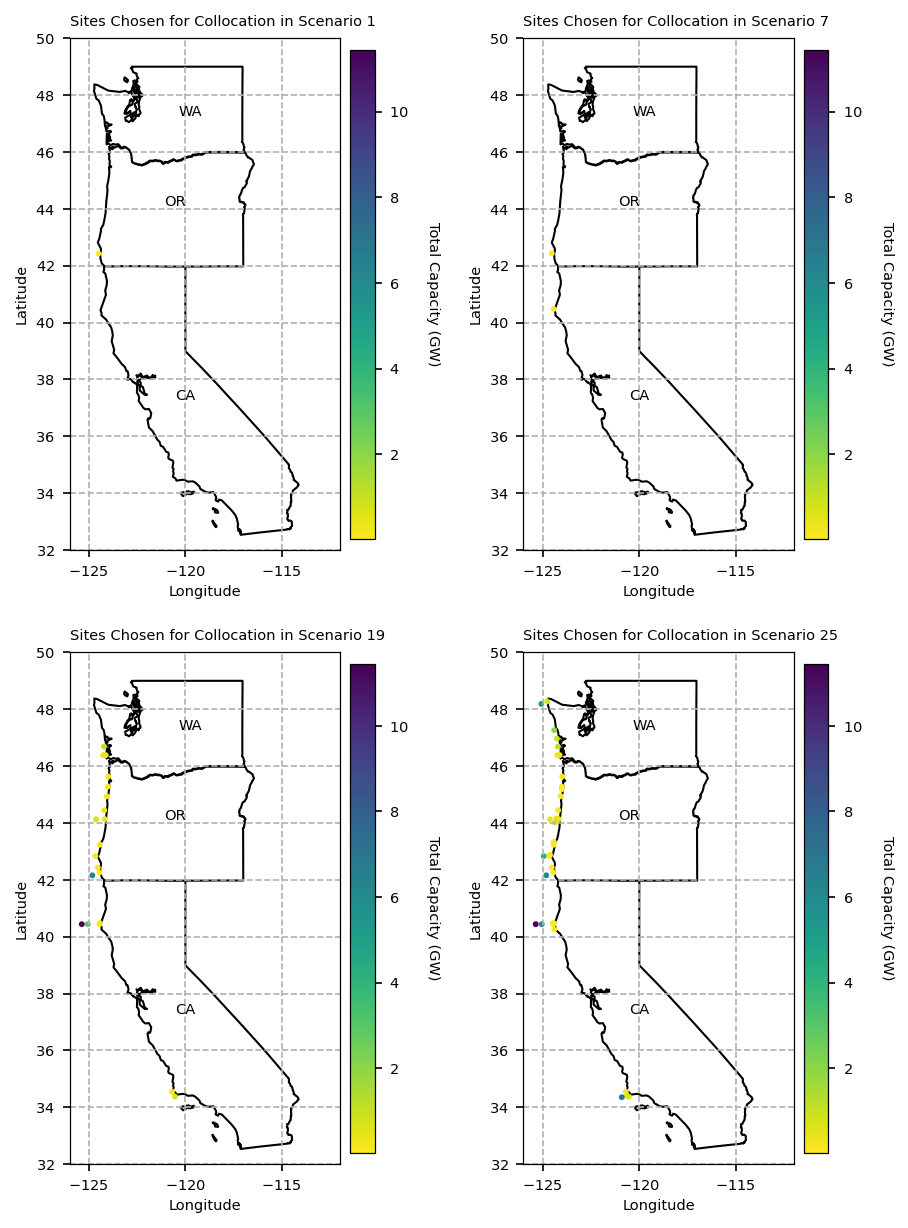

In [117]:
# Plot
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(6,8), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = coloc_d[1]['lon']
y = coloc_d[1]['lat']
a = coloc_d[25]['Total_GW'].min()
b = coloc_d[25]['Total_GW'].max()
s = ax1.scatter(x, y, c = coloc_d[1]['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1,fraction=0.07, pad=0.03)
ax1.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
ax1.set_ylabel('Latitude',fontsize=7)
ax1.set_ylim(32,50)
ax1.set_title('Sites Chosen for Collocation in Scenario 1')

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)

x = coloc_d[7]['lon']
y = coloc_d[7]['lat']
a = coloc_d[25]['Total_GW'].min()
b = coloc_d[25]['Total_GW'].max()
s = ax2.scatter(x, y, c = coloc_d[7]['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax2,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax2.set_xlabel('Longitude',fontsize=7)
ax2.set_ylabel('Latitude',fontsize=7)
ax2.set_ylim(32,50)
ax2.set_title('Sites Chosen for Collocation in Scenario 7')

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax3.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax3, color='white', edgecolor='black', linewidth=1)

x = coloc_d[19]['lon']
y = coloc_d[19]['lat']
a = coloc_d[25]['Total_GW'].min()
b = coloc_d[25]['Total_GW'].max()
s = ax3.scatter(x, y, c = coloc_d[19]['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax3,fraction=0.07, pad=0.03)
ax3.set_xlabel('Longitude',fontsize=7)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
ax3.set_ylabel('Latitude',fontsize=7)
ax3.set_ylim(32,50)
ax3.set_title('Sites Chosen for Collocation in Scenario 19')

# ax3.set_ylabel("Latitude")
# ax3.set_xlabel("Longitude")
ax3.grid(axis='y', linestyle='dashed')
ax3.grid(axis='x', linestyle='dashed')
#handles, labels = ax3.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax3.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax4.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax4, color='white', edgecolor='black', linewidth=1)

x = coloc_d[25]['lon']
y = coloc_d[25]['lat']
a = coloc_d[25]['Total_GW'].min()
b = coloc_d[25]['Total_GW'].max()
s = ax4.scatter(x, y, c = coloc_d[25]['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax4,fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=7, labelpad=15)
cbar.ax.tick_params(labelsize=7)
ax4.set_xlabel('Longitude',fontsize=7)
ax4.set_ylabel('Latitude',fontsize=7)
ax4.set_ylim(32,50)
ax4.set_title('Sites Chosen for Collocation in Scenario 25')

# ax4.set_ylabel("Latitude")
# ax4.set_xlabel("Longitude")
ax4.grid(axis='y', linestyle='dashed')
ax4.grid(axis='x', linestyle='dashed')
#handles, labels = ax4.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax4.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

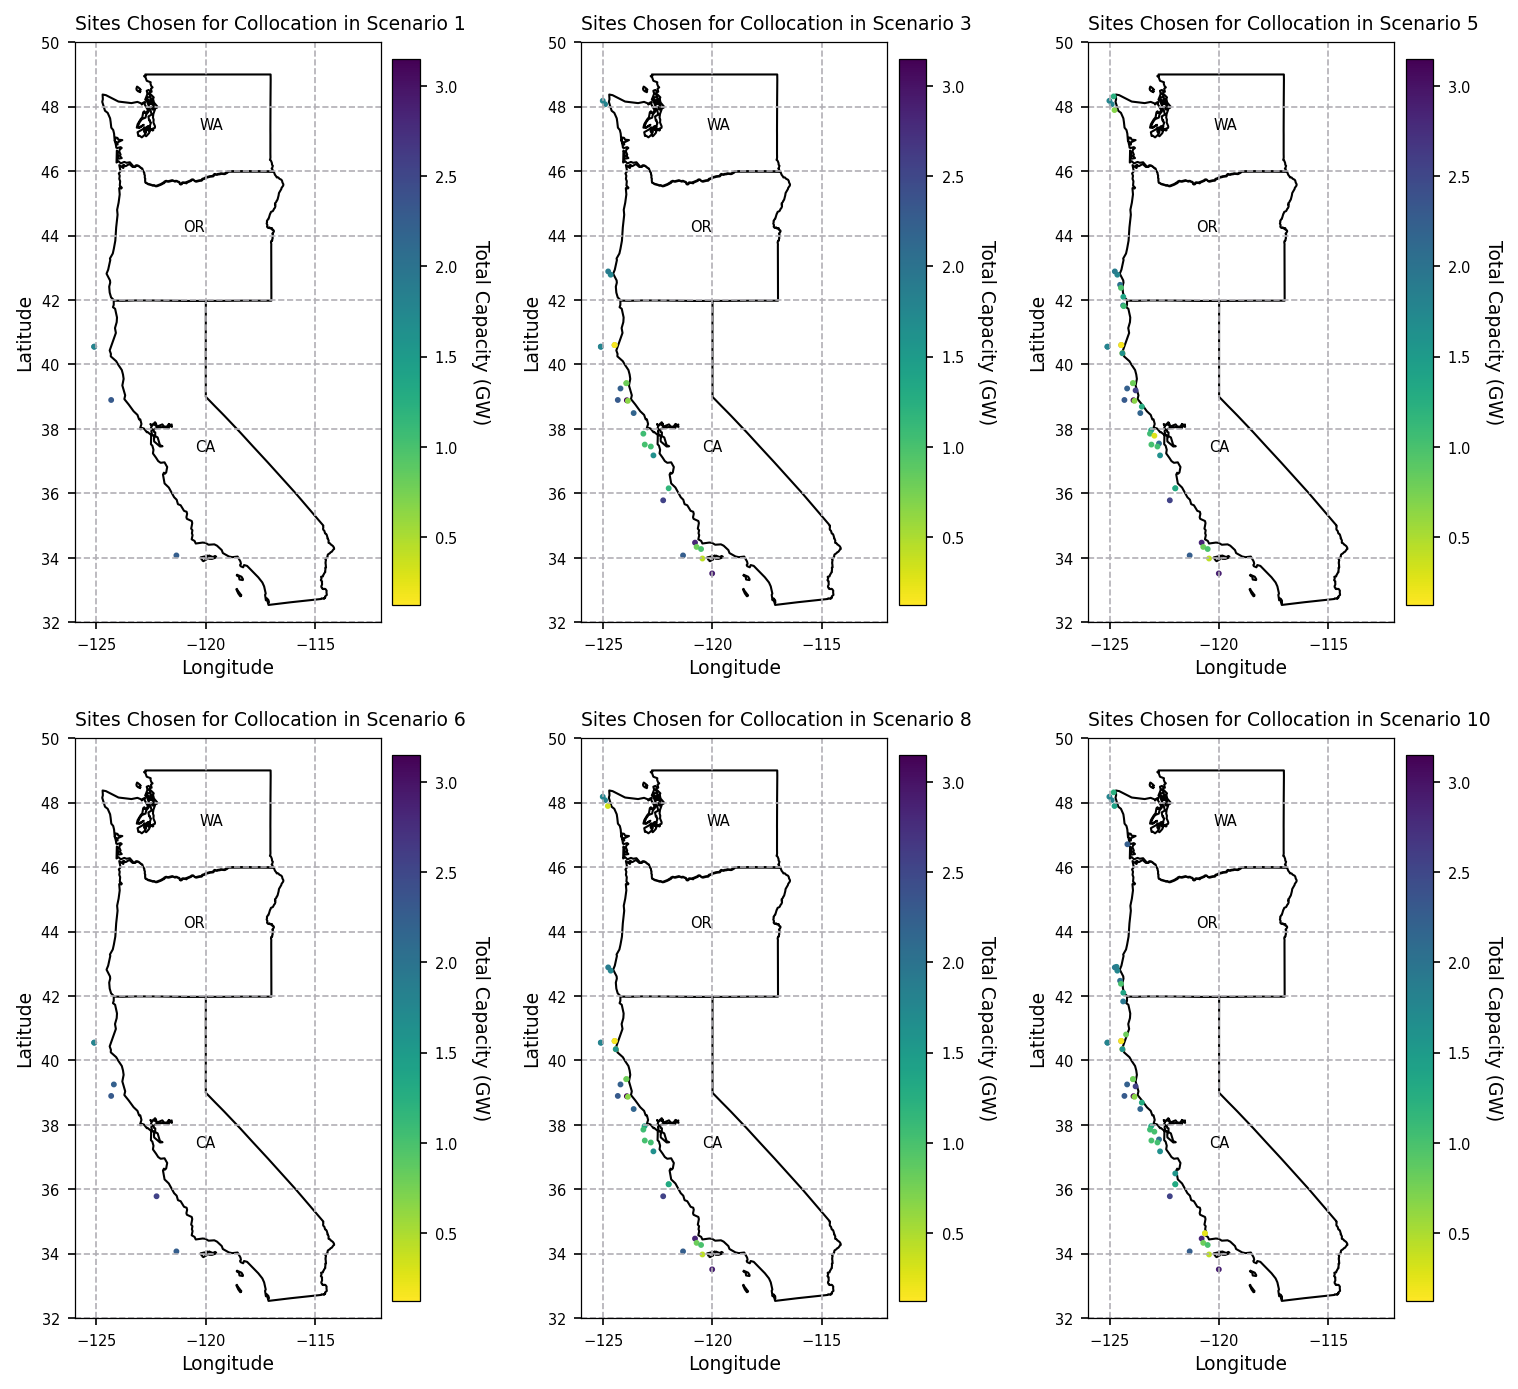

In [109]:
# Plot
fig, axs = plt.subplots(2,3,figsize=(10,9), dpi=150)
fig.patch.set_facecolor('white')
fig.tight_layout()
fig.subplots_adjust(wspace=.3)
fig.subplots_adjust(hspace=.2)
a = collocated_sites['Total_GW'].min()
b = collocated_sites['Total_GW'].max()

axs[0,0].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[0,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[0,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[0,0], color='white', edgecolor='black', linewidth=1)

x = s1['lon']
y = s1['lat']
# a = s1['Total_GW'].min()
# b = s1['Total_GW'].max()
s = axs[0,0].scatter(x, y, c = s1['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[0,0],fraction=0.07, pad=0.03)
axs[0,0].set_xlabel('Longitude',fontsize=9)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
axs[0,0].set_ylabel('Latitude',fontsize=9)
axs[0,0].set_ylim(32,50)
axs[0,0].set_title('Sites Chosen for Collocation in Scenario 1',fontsize=9)
axs[0,0].grid(axis='y', linestyle='dashed')
axs[0,0].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[0,0].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[0,1].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[0,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[0,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[0,1], color='white', edgecolor='black', linewidth=1)

x = s3['lon']
y = s3['lat']
# a = s3['Total_GW'].min()
# b = s3['Total_GW'].max()
s = axs[0,1].scatter(x, y, c = s3['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[0,1],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[0,1].set_xlabel('Longitude',fontsize=9)
axs[0,1].set_ylabel('Latitude',fontsize=9)
axs[0,1].set_ylim(32,50)
axs[0,1].set_title('Sites Chosen for Collocation in Scenario 3',fontsize=9)
axs[0,1].grid(axis='y', linestyle='dashed')
axs[0,1].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[0,1].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[0,2].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[0,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[0,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[0,2], color='white', edgecolor='black', linewidth=1)

x = s5['lon']
y = s5['lat']
s = axs[0,2].scatter(x, y, c = s5['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[0,2],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[0,2].set_xlabel('Longitude',fontsize=9)
axs[0,2].set_ylabel('Latitude',fontsize=9)
axs[0,2].set_ylim(32,50)
axs[0,2].set_title('Sites Chosen for Collocation in Scenario 5',fontsize=9)
axs[0,2].grid(axis='y', linestyle='dashed')
axs[0,2].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[0,2].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[1,0].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[1,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[1,0], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[1,0], color='white', edgecolor='black', linewidth=1)

x = s6['lon']
y = s6['lat']
# a = s6['Total_GW'].min()
# b = s6['Total_GW'].max()
s = axs[1,0].scatter(x, y, c = s6['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[1,0],fraction=0.07, pad=0.03)
axs[1,0].set_xlabel('Longitude',fontsize=9)
cbar.ax.tick_params(labelsize=7)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
axs[1,0].set_ylabel('Latitude',fontsize=9)
axs[1,0].set_ylim(32,50)
axs[1,0].set_title('Sites Chosen for Collocation in Scenario 6',fontsize=9)
axs[1,0].grid(axis='y', linestyle='dashed')
axs[1,0].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[1,0].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[1,1].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[1,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[1,1], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[1,1], color='white', edgecolor='black', linewidth=1)

x = s8['lon']
y = s8['lat']
# a = s8['Total_GW'].min()
# b = s8['Total_GW'].max()
s = axs[1,1].scatter(x, y, c = s8['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[1,1],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[1,1].set_xlabel('Longitude',fontsize=9)
axs[1,1].set_ylabel('Latitude',fontsize=9)
axs[1,1].set_ylim(32,50)
axs[1,1].set_title('Sites Chosen for Collocation in Scenario 8',fontsize=9)
axs[1,1].grid(axis='y', linestyle='dashed')
axs[1,1].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[1,1].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

axs[1,2].tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=axs[1,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=axs[1,2], color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=axs[1,2], color='white', edgecolor='black', linewidth=1)

x = s10['lon']
y = s10['lat']
# a = s10['Total_GW'].min()
# b = s10['Total_GW'].max()
s = axs[1,2].scatter(x, y, c = s10['Total_GW'], cmap="viridis_r", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=axs[1,2],fraction=0.07, pad=0.03)
cbar.ax.set_ylabel('Total Capacity (GW)', rotation=270, fontsize=9, labelpad=15)
cbar.ax.tick_params(labelsize=7)
axs[1,2].set_xlabel('Longitude',fontsize=9)
axs[1,2].set_ylabel('Latitude',fontsize=9)
axs[1,2].set_ylim(32,50)
axs[1,2].set_title('Sites Chosen for Collocation in Scenario 10',fontsize=9)
axs[1,2].grid(axis='y', linestyle='dashed')
axs[1,2].grid(axis='x', linestyle='dashed')

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   axs[1,2].annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

plt.savefig(folder_to_save_results+"Sites Chosen for Collocation by Scenario.png", transparent=False)

Text(0, 0.5, 'Latitude')

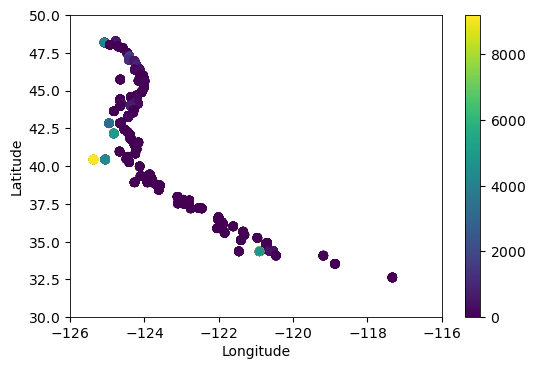

In [71]:
x = gen_cap_osw['lon']
y = gen_cap_osw['lat']
s = plt.scatter(x, y, c = gen_cap_osw['GenCapacity'], cmap="viridis")
c = plt.colorbar()
a = gen_cap_osw['GenCapacity'].min()
b = gen_cap_osw['GenCapacity'].max()
plt.clim(a, b) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')

No handles with labels found to put in legend.


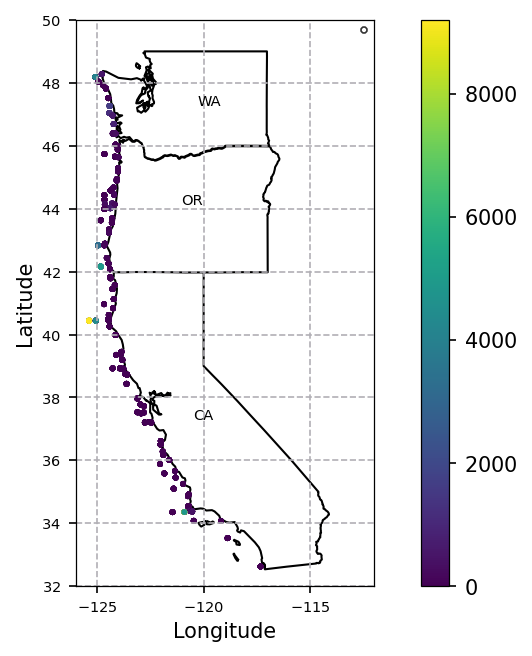

In [72]:
# Plot
fig = plt.figure(figsize=(8,5), dpi=150)
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)
ax.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)

x = gen_cap_osw['lon']
y = gen_cap_osw['lat']
s = plt.scatter(x, y, c = gen_cap_osw['GenCapacity'], cmap="viridis",s=4)
c = plt.colorbar()
a = gen_cap_osw['GenCapacity'].min()
b = gen_cap_osw['GenCapacity'].max()
plt.clim(a, b) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(32,50)

# ax.set_ylabel("Latitude")
# ax.set_xlabel("Longitude")
ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')
#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper right",
    fontsize=7,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)
for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax=plt.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

No handles with labels found to put in legend.


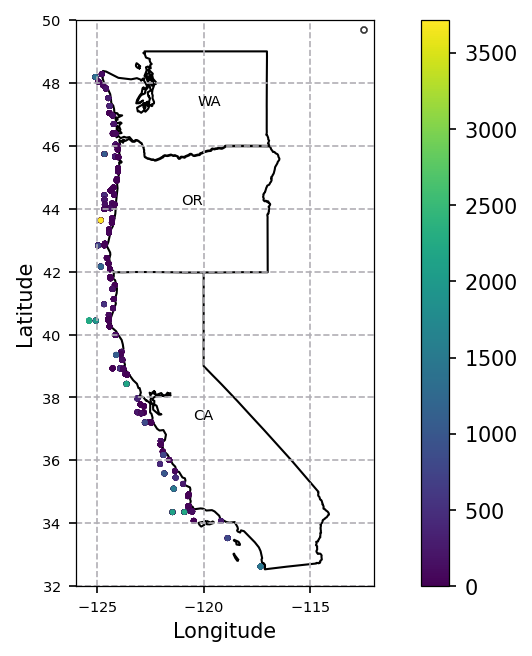

In [73]:
# Plot
fig = plt.figure(figsize=(8,5), dpi=150)
fig.patch.set_facecolor('white')
ax=fig.add_subplot(111)
ax.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax, color='white', edgecolor='black', linewidth=1)

x = gen_cap_wave['lon']
y = gen_cap_wave['lat']
s = plt.scatter(x, y, c = gen_cap_wave['GenCapacity'], cmap="viridis",s=4)
c = plt.colorbar()
a = gen_cap_wave['GenCapacity'].min()
b = gen_cap_wave['GenCapacity'].max()
plt.clim(a, b) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(32,50)

# ax.set_ylabel("Latitude")
# ax.set_xlabel("Longitude")
ax.grid(axis='y', linestyle='dashed')
ax.grid(axis='x', linestyle='dashed')
#handles, labels = ax.get_legend_handles_labels()
ax.legend(
   # handles[::-1],
   # labels[::-1],
   # bbox_to_anchor=(1, 1),
    loc="upper right",
    fontsize=7,
    handlelength=1,
    frameon=True,
    edgecolor="black",
    facecolor="white",
)
for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax=plt.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [76]:
gen_cap_osw

,GENERATION_PROJECT,PERIOD,gen_tech,gen_load_zone,GenCapacity,tech_map,scenario,site_id,site_name,state,lat,lon,load_zone,area_sq_km,wave_cap_mw,osw_cap_mw,wind_turbine_type
2525,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,1,101,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2526,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,2,101,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2527,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,3,101,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2528,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,4,101,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
2529,1400000101,2050,Offshore_Wind,WA_W,0.00,Offshore_Wind,5,101,Neah Bay 1,WA,48.28,-124.77,WA_W,132.85,139.69,571.26,fixed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,21,201,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5046,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,22,201,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5047,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,23,201,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float
5048,1400000201,2050,Offshore_Wind,CA_PGE_S,0.00,Offshore_Wind,24,201,Diablo Canyon_Call,CA,35.10,-121.40,CA_PGE_S,"1,441.44","1,515.67","6,198.19",float


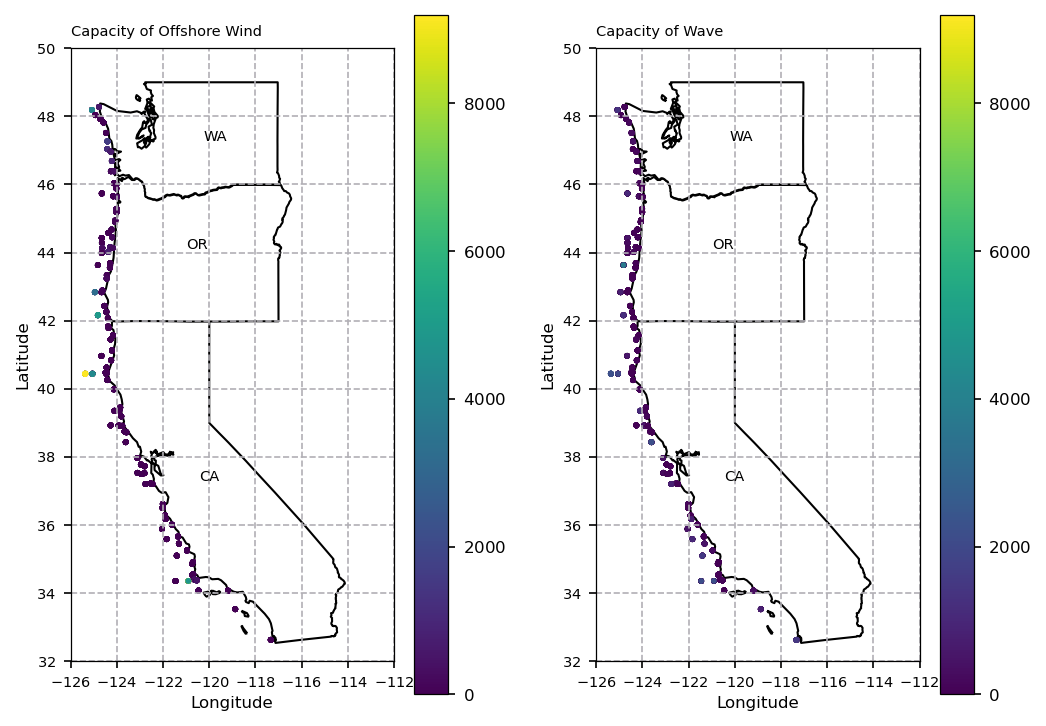

In [74]:
# Plot
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(8,6), dpi=150)
fig.subplots_adjust(wspace=.3)
fig.patch.set_facecolor('white')

ax1.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax1, color='white', edgecolor='black', linewidth=1)

x = gen_cap_osw['lon']
y = gen_cap_osw['lat']
a = gen_cap_osw_wave['GenCapacity'].min()
b = gen_cap_osw_wave['GenCapacity'].max()
s = ax1.scatter(x, y, c = gen_cap_osw['GenCapacity'], cmap="viridis", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax1)
ax1.set_xlabel('Longitude',fontsize=8)
ax1.set_ylabel('Latitude',fontsize=8)
ax1.set_ylim(32,50)
ax1.set_title('Capacity of Offshore Wind')
cbar.ax.tick_params(labelsize=8)

# ax1.set_ylabel("Latitude")
# ax1.set_xlabel("Longitude")
ax1.grid(axis='y', linestyle='dashed')
ax1.grid(axis='x', linestyle='dashed')
#handles, labels = ax1.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax1.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)

x = gen_cap_wave['lon']
y = gen_cap_wave['lat']
a = gen_cap_osw_wave['GenCapacity'].min()
b = gen_cap_osw_wave['GenCapacity'].max()
s = ax2.scatter(x, y, c = gen_cap_wave['GenCapacity'], cmap="viridis", s=4, vmin=a, vmax=b)
cbar = fig.colorbar(s,ax=ax2)
ax2.set_xlabel('Longitude',fontsize=8)
ax2.set_ylabel('Latitude',fontsize=8)
ax2.set_ylim(32,50)
ax2.set_title('Capacity of Wave')
cbar.ax.tick_params(labelsize=8)

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

In [ ]:
ax2.tick_params(labelsize=7)
ax=usa[usa.STATE_ABBR=='CA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='OR'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)
ax=usa[usa.STATE_ABBR=='WA'].plot(ax=ax2, color='white', edgecolor='black', linewidth=1)

x = gen_cap_wave['lon']
y = gen_cap_wave['lat']
a = gen_cap_wave['GenCapacity'].min()
b = gen_cap_wave['GenCapacity'].max()
s = ax2.scatter(x, y, c = gen_cap_wave['GenCapacity'], cmap="viridis", s=4, clim=(a, b))
cbar = fig.colorbar(s,ax=ax2)
ax2.set_xlabel('Longitude',fontsize=8)
ax2.set_ylabel('Latitude',fontsize=8)
ax2.set_ylim(32,50)
cbar.ax.tick_params(labelsize=8)

# ax2.set_ylabel("Latitude")
# ax2.set_xlabel("Longitude")
ax2.grid(axis='y', linestyle='dashed')
ax2.grid(axis='x', linestyle='dashed')
#handles, labels = ax2.get_legend_handles_labels()

for idx, row in usa[usa.STATE_ABBR.isin(['CA', 'OR', 'WA'])].iterrows():
   ax2.annotate(text=row['STATE_ABBR'], xy=row['coords'], horizontalalignment='center')

<Figure size 600x400 with 0 Axes>